In [101]:
# 2016 Global Ecological Footprint
# dataset: https://www.kaggle.com/datasets/footprintnetwork/ecological-footprint
# Importing packages
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
from matplotlib import colormaps

pd.set_option('display.max_columns',30)

In [3]:
# Reading the data
df=pd.read_csv(r'C:\Users\dorot\Downloads\footprints\countries.csv')

In [7]:
# Looking at the data we are working with
df

,Country,Region,Population (millions),HDI,GDP per Capita,Cropland Footprint,Grazing Footprint,Forest Footprint,Carbon Footprint,Fish Footprint,Total Ecological Footprint,Cropland,Grazing Land,Forest Land,Fishing Water,Urban Land,Total Biocapacity,Biocapacity Deficit or Reserve,Earths Required,Countries Required,Data Quality
0,Afghanistan,Middle East/Central Asia,29.82,0.46,$614.66,0.30,0.20,0.08,0.18,0.00,0.79,0.24,0.20,0.02,0.00,0.04,0.50,-0.30,0.46,1.60,6
1,Albania,Northern/Eastern Europe,3.16,0.73,"$4,534.37",0.78,0.22,0.25,0.87,0.02,2.21,0.55,0.21,0.29,0.07,0.06,1.18,-1.03,1.27,1.87,6
2,Algeria,Africa,38.48,0.73,"$5,430.57",0.60,0.16,0.17,1.14,0.01,2.12,0.24,0.27,0.03,0.01,0.03,0.59,-1.53,1.22,3.61,5
3,Angola,Africa,20.82,0.52,"$4,665.91",0.33,0.15,0.12,0.20,0.09,0.93,0.20,1.42,0.64,0.26,0.04,2.55,1.61,0.54,0.37,6
4,Antigua and Barbuda,Latin America,0.09,0.78,"$13,205.10",NaN,NaN,NaN,NaN,NaN,5.38,NaN,NaN,NaN,NaN,NaN,0.94,-4.44,3.11,5.70,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183,Viet Nam,Asia-Pacific,90.80,0.66,"$1,532.31",0.50,0.01,0.19,0.79,0.05,1.65,0.55,0.01,0.17,0.16,0.10,1.00,-0.65,0.95,1.66,6
184,Wallis and Futuna Islands,Asia-Pacific,0.01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.07,NaN,NaN,NaN,NaN,NaN,1.51,-0.56,1.19,1.37,3T
185,Yemen,Middle East/Central Asia,23.85,0.50,"$1,302.30",0.34,0.14,0.04,0.42,0.04,1.03,0.09,0.12,0.04,0.20,0.04,0.50,-0.53,0.59,2.06,5
186,Zambia,Africa,14.08,0.58,"$1,740.64",0.19,0.18,0.33,0.24,0.01,0.99,0.24,0.94,0.99,0.02,0.04,2.23,1.24,0.57,0.44,6


In [9]:
# Data Frame dimensions
df.shape

(188, 21)

In [11]:
# Analyzing the first 10 rows
df.head(10)

,Country,Region,Population (millions),HDI,GDP per Capita,Cropland Footprint,Grazing Footprint,Forest Footprint,Carbon Footprint,Fish Footprint,Total Ecological Footprint,Cropland,Grazing Land,Forest Land,Fishing Water,Urban Land,Total Biocapacity,Biocapacity Deficit or Reserve,Earths Required,Countries Required,Data Quality
0,Afghanistan,Middle East/Central Asia,29.82,0.46,$614.66,0.30,0.20,0.08,0.18,0.00,0.79,0.24,0.20,0.02,0.00,0.04,0.50,-0.30,0.46,1.60,6
1,Albania,Northern/Eastern Europe,3.16,0.73,"$4,534.37",0.78,0.22,0.25,0.87,0.02,2.21,0.55,0.21,0.29,0.07,0.06,1.18,-1.03,1.27,1.87,6
2,Algeria,Africa,38.48,0.73,"$5,430.57",0.60,0.16,0.17,1.14,0.01,2.12,0.24,0.27,0.03,0.01,0.03,0.59,-1.53,1.22,3.61,5
3,Angola,Africa,20.82,0.52,"$4,665.91",0.33,0.15,0.12,0.20,0.09,0.93,0.20,1.42,0.64,0.26,0.04,2.55,1.61,0.54,0.37,6
4,Antigua and Barbuda,Latin America,0.09,0.78,"$13,205.10",NaN,NaN,NaN,NaN,NaN,5.38,NaN,NaN,NaN,NaN,NaN,0.94,-4.44,3.11,5.70,2
5,Argentina,Latin America,41.09,0.83,"$13,540.00",0.78,0.79,0.29,1.08,0.10,3.14,2.64,1.86,0.66,1.67,0.10,6.92,3.78,1.82,0.45,6
6,Armenia,Middle East/Central Asia,2.97,0.73,"$3,426.39",0.74,0.18,0.34,0.89,0.01,2.23,0.44,0.26,0.10,0.02,0.07,0.89,-1.35,1.29,2.52,3B
7,Aruba,Latin America,0.10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.88,NaN,NaN,NaN,NaN,NaN,0.57,-11.31,6.86,20.69,2
8,Australia,Asia-Pacific,23.05,0.93,"$66,604.20",2.68,0.63,0.89,4.85,0.11,9.31,5.42,5.81,2.01,3.19,0.14,16.57,7.26,5.37,0.56,5
9,Austria,European Union,8.46,0.88,"$51,274.10",0.82,0.27,0.63,4.14,0.06,6.06,0.71,0.16,2.04,0.00,0.15,3.07,-3.00,3.50,1.98,5


In [13]:
# Cheking the data types
df.dtypes

Country                            object
Region                             object
Population (millions)             float64
HDI                               float64
GDP per Capita                     object
Cropland Footprint                float64
Grazing Footprint                 float64
Forest Footprint                  float64
Carbon Footprint                  float64
Fish Footprint                    float64
Total Ecological Footprint        float64
Cropland                          float64
Grazing Land                      float64
Forest Land                       float64
Fishing Water                     float64
Urban Land                        float64
Total Biocapacity                 float64
Biocapacity Deficit or Reserve    float64
Earths Required                   float64
Countries Required                float64
Data Quality                       object
dtype: object

In [25]:
df.describe()

,Population (millions),HDI,Cropland Footprint,Grazing Footprint,Forest Footprint,Carbon Footprint,Fish Footprint,Total Ecological Footprint,Cropland,Grazing Land,Forest Land,Fishing Water,Urban Land,Total Biocapacity,Biocapacity Deficit or Reserve,Earths Required,Countries Required
count,188.000000,172.00000,173.000000,173.000000,173.000000,173.000000,173.000000,188.000000,173.000000,173.000000,173.000000,173.000000,173.000000,188.000000,188.000000,188.000000,188.000000
mean,37.342372,0.68636,0.578208,0.263179,0.373815,1.804913,0.122486,3.317606,0.531850,0.456590,2.459191,0.595145,0.067110,4.019681,0.702074,1.915745,4.037397
std,140.756836,0.15604,0.355691,0.352067,0.359349,1.898283,0.158427,2.370931,0.672567,1.014738,10.593956,1.661872,0.054844,11.689075,11.771339,1.369624,12.444616
min,0.000000,0.34000,0.070000,0.000000,0.010000,0.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000,0.050000,-14.140000,0.240000,0.020000
25%,2.037500,0.55750,0.350000,0.080000,0.170000,0.420000,0.020000,1.482500,0.180000,0.030000,0.060000,0.030000,0.030000,0.675000,-1.935000,0.855000,0.942500
50%,7.970000,0.72000,0.520000,0.180000,0.260000,1.140000,0.070000,2.740000,0.350000,0.120000,0.340000,0.110000,0.050000,1.310000,-0.730000,1.580000,1.705000
75%,24.870000,0.80250,0.700000,0.320000,0.460000,2.600000,0.150000,4.640000,0.590000,0.340000,1.170000,0.370000,0.090000,2.815000,0.212500,2.677500,2.847500
max,1408.040000,0.94000,2.680000,3.470000,3.030000,12.650000,0.820000,15.820000,5.420000,8.230000,95.160000,16.070000,0.270000,111.350000,109.010000,9.140000,159.470000


In [19]:
# Deleting duplicate values if there are any
df.duplicated()
df.drop_duplicates()

,Country,Region,Population (millions),HDI,GDP per Capita,Cropland Footprint,Grazing Footprint,Forest Footprint,Carbon Footprint,Fish Footprint,Total Ecological Footprint,Cropland,Grazing Land,Forest Land,Fishing Water,Urban Land,Total Biocapacity,Biocapacity Deficit or Reserve,Earths Required,Countries Required,Data Quality
0,Afghanistan,Middle East/Central Asia,29.82,0.46,$614.66,0.30,0.20,0.08,0.18,0.00,0.79,0.24,0.20,0.02,0.00,0.04,0.50,-0.30,0.46,1.60,6
1,Albania,Northern/Eastern Europe,3.16,0.73,"$4,534.37",0.78,0.22,0.25,0.87,0.02,2.21,0.55,0.21,0.29,0.07,0.06,1.18,-1.03,1.27,1.87,6
2,Algeria,Africa,38.48,0.73,"$5,430.57",0.60,0.16,0.17,1.14,0.01,2.12,0.24,0.27,0.03,0.01,0.03,0.59,-1.53,1.22,3.61,5
3,Angola,Africa,20.82,0.52,"$4,665.91",0.33,0.15,0.12,0.20,0.09,0.93,0.20,1.42,0.64,0.26,0.04,2.55,1.61,0.54,0.37,6
4,Antigua and Barbuda,Latin America,0.09,0.78,"$13,205.10",NaN,NaN,NaN,NaN,NaN,5.38,NaN,NaN,NaN,NaN,NaN,0.94,-4.44,3.11,5.70,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183,Viet Nam,Asia-Pacific,90.80,0.66,"$1,532.31",0.50,0.01,0.19,0.79,0.05,1.65,0.55,0.01,0.17,0.16,0.10,1.00,-0.65,0.95,1.66,6
184,Wallis and Futuna Islands,Asia-Pacific,0.01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.07,NaN,NaN,NaN,NaN,NaN,1.51,-0.56,1.19,1.37,3T
185,Yemen,Middle East/Central Asia,23.85,0.50,"$1,302.30",0.34,0.14,0.04,0.42,0.04,1.03,0.09,0.12,0.04,0.20,0.04,0.50,-0.53,0.59,2.06,5
186,Zambia,Africa,14.08,0.58,"$1,740.64",0.19,0.18,0.33,0.24,0.01,0.99,0.24,0.94,0.99,0.02,0.04,2.23,1.24,0.57,0.44,6


In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188 entries, 0 to 187
Data columns (total 20 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Country                         188 non-null    object 
 1   Region                          188 non-null    object 
 2   Population (millions)           188 non-null    float64
 3   HDI                             172 non-null    float64
 4   GDP per Capita                  173 non-null    object 
 5   Cropland Footprint              173 non-null    float64
 6   Grazing Footprint               173 non-null    float64
 7   Forest Footprint                173 non-null    float64
 8   Carbon Footprint                173 non-null    float64
 9   Fish Footprint                  173 non-null    float64
 10  Total Ecological Footprint      188 non-null    float64
 11  Cropland                        173 non-null    float64
 12  Grazing Land                    173 

In [295]:
# Dropping unnecessary columns
df=df.drop(['Data Quality'],axis=1)

In [297]:
# Cheking how many null values we have
df.isna().sum()

Country                            0
Region                             0
Population (millions)              0
HDI                               16
GDP per Capita                    15
Cropland Footprint                15
Grazing Footprint                 15
Forest Footprint                  15
Carbon Footprint                  15
Fish Footprint                    15
Total Ecological Footprint         0
Cropland                          15
Grazing Land                      15
Forest Land                       15
Fishing Water                     15
Urban Land                        15
Total Biocapacity                  0
Biocapacity Deficit or Reserve     0
Earths Required                    0
Countries Required                 0
dtype: int64

In [21]:
# Filling missing values with 0
df['HDI']=df['HDI'].fillna(0)
df['GDP per Capita']=df['GDP per Capita'].fillna(0)
df['Cropland Footprint']=df['Cropland Footprint'].fillna(0)
df['Grazing Footprint']=df['Grazing Footprint'].fillna(0)
df['Forest Footprint']=df['Forest Footprint'].fillna(0)
df['Carbon Footprint']=df['Carbon Footprint'].fillna(0)
df['Fish Footprint']=df['Fish Footprint'].fillna(0)
df['Cropland']=df['Cropland'].fillna(0)
df['Grazing Land']=df['Grazing Land'].fillna(0)
df['Forest Land']=df['Forest Land'].fillna(0)
df['Fishing Water']=df['Fishing Water'].fillna(0)
df['Urban Land']=df['Urban Land'].fillna(0)
df.isna().sum()

Country                           0
Region                            0
Population (millions)             0
HDI                               0
GDP per Capita                    0
Cropland Footprint                0
Grazing Footprint                 0
Forest Footprint                  0
Carbon Footprint                  0
Fish Footprint                    0
Total Ecological Footprint        0
Cropland                          0
Grazing Land                      0
Forest Land                       0
Fishing Water                     0
Urban Land                        0
Total Biocapacity                 0
Biocapacity Deficit or Reserve    0
Earths Required                   0
Countries Required                0
Data Quality                      0
dtype: int64

In [23]:
# Cleaning data and converting data type
df['GDP per Capita'] = df['GDP per Capita'].replace('[\\$,]', '', regex=True)
df['GDP per Capita']=df['GDP per Capita'].astype(float)
df

,Country,Region,Population (millions),HDI,GDP per Capita,Cropland Footprint,Grazing Footprint,Forest Footprint,Carbon Footprint,Fish Footprint,Total Ecological Footprint,Cropland,Grazing Land,Forest Land,Fishing Water,Urban Land,Total Biocapacity,Biocapacity Deficit or Reserve,Earths Required,Countries Required,Data Quality
0,Afghanistan,Middle East/Central Asia,29.82,0.46,614.66,0.30,0.20,0.08,0.18,0.00,0.79,0.24,0.20,0.02,0.00,0.04,0.50,-0.30,0.46,1.60,6
1,Albania,Northern/Eastern Europe,3.16,0.73,4534.37,0.78,0.22,0.25,0.87,0.02,2.21,0.55,0.21,0.29,0.07,0.06,1.18,-1.03,1.27,1.87,6
2,Algeria,Africa,38.48,0.73,5430.57,0.60,0.16,0.17,1.14,0.01,2.12,0.24,0.27,0.03,0.01,0.03,0.59,-1.53,1.22,3.61,5
3,Angola,Africa,20.82,0.52,4665.91,0.33,0.15,0.12,0.20,0.09,0.93,0.20,1.42,0.64,0.26,0.04,2.55,1.61,0.54,0.37,6
4,Antigua and Barbuda,Latin America,0.09,0.78,13205.10,0.00,0.00,0.00,0.00,0.00,5.38,0.00,0.00,0.00,0.00,0.00,0.94,-4.44,3.11,5.70,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183,Viet Nam,Asia-Pacific,90.80,0.66,1532.31,0.50,0.01,0.19,0.79,0.05,1.65,0.55,0.01,0.17,0.16,0.10,1.00,-0.65,0.95,1.66,6
184,Wallis and Futuna Islands,Asia-Pacific,0.01,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2.07,0.00,0.00,0.00,0.00,0.00,1.51,-0.56,1.19,1.37,3T
185,Yemen,Middle East/Central Asia,23.85,0.50,1302.30,0.34,0.14,0.04,0.42,0.04,1.03,0.09,0.12,0.04,0.20,0.04,0.50,-0.53,0.59,2.06,5
186,Zambia,Africa,14.08,0.58,1740.64,0.19,0.18,0.33,0.24,0.01,0.99,0.24,0.94,0.99,0.02,0.04,2.23,1.24,0.57,0.44,6


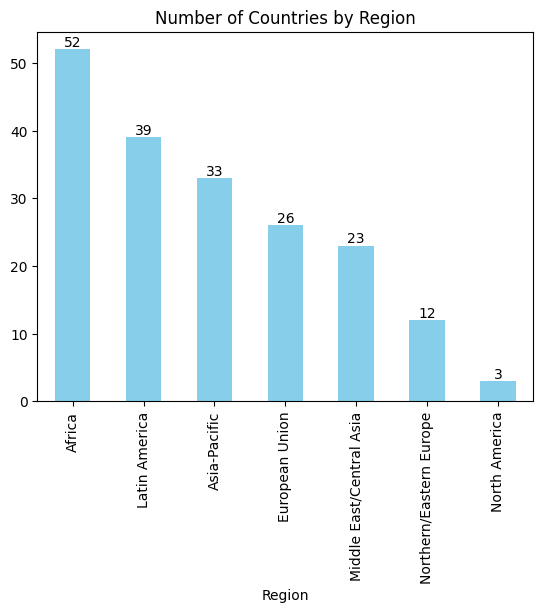

In [29]:
# Counting how many Countries are there in each Region
ax=df.groupby('Region')['Country'].count().sort_values(ascending=False).plot(kind='bar',color='skyblue')
ax.bar_label(ax.containers[0])
ax.set_title("Number of Countries by Region")
plt.show()

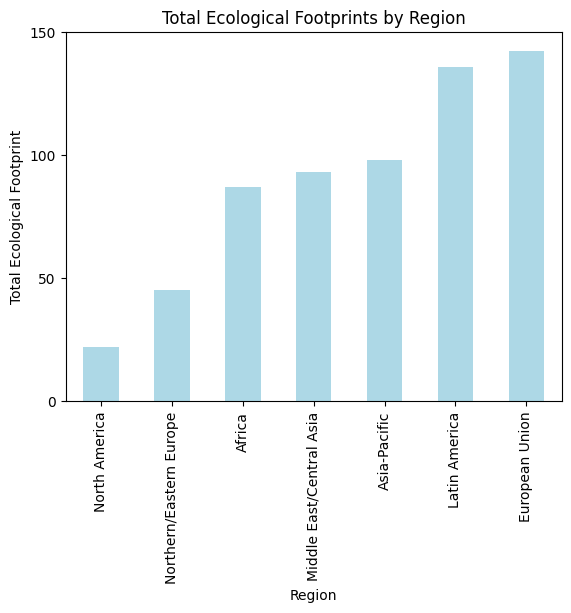

In [31]:
# Calculating total ecological footprints for each region
ax=df.groupby('Region')['Total Ecological Footprint'].sum().sort_values().plot(kind='bar', color='lightblue')
plt.yticks([0,50, 100, 150]) 
ax.set_ylabel('Total Ecological Footprint')
ax.set_title("Total Ecological Footprints by Region")
plt.show()

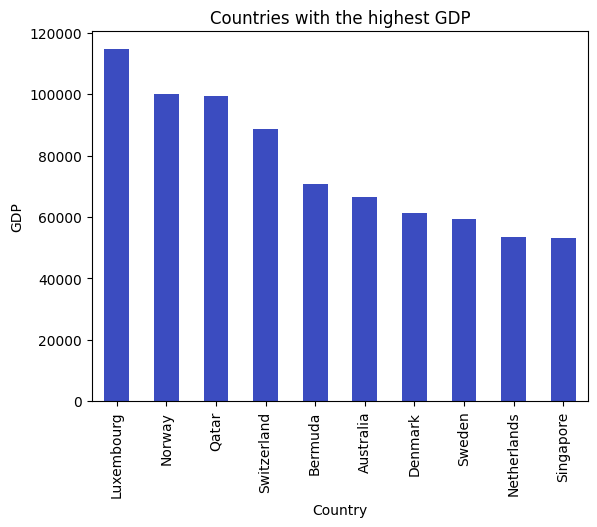

In [33]:
# Top 10 countries with the highest GDP per Capita
df2=df.set_index('Country')
ax=df2['GDP per Capita'].sort_values(ascending=False).head(10).plot(kind='bar',colormap='coolwarm')
ax.set_xlabel('Country')
ax.set_ylabel('GDP')
ax.set_title("Countries with the highest GDP")
plt.show()

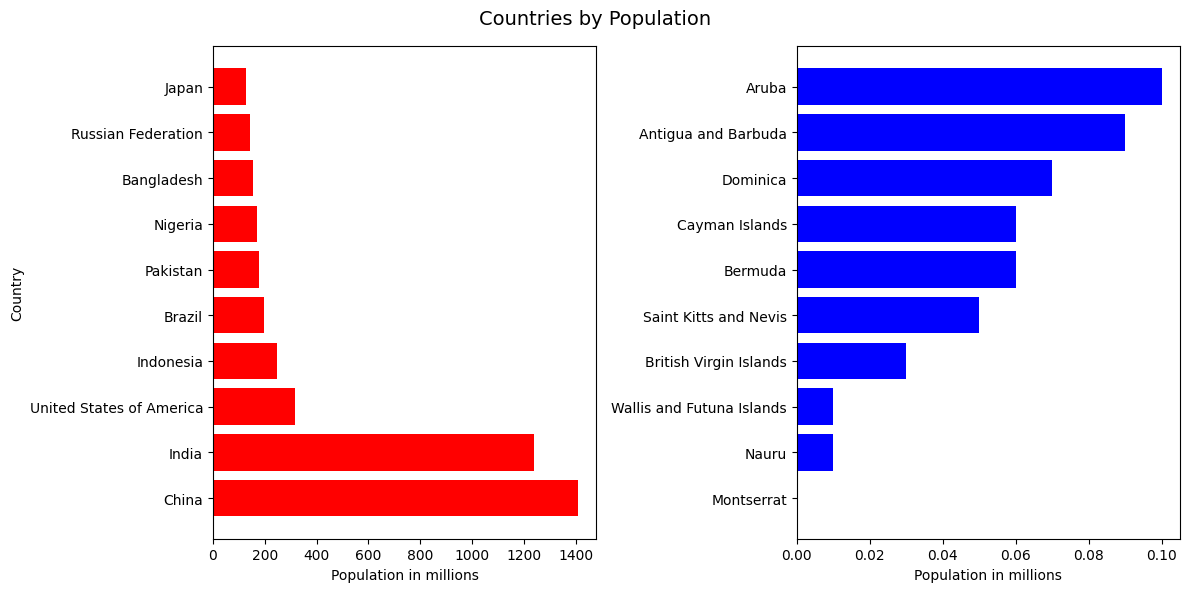

In [61]:
# Countries with the highest and lowest population in millions
fig, axs = plt.subplots(1, 2, figsize=(12, 6))
axs[0].barh(df2['Population (millions)'].sort_values(ascending=False).head(10).index, 
            df2['Population (millions)'].sort_values(ascending=False).head(10).values, color='red')
axs[0].set(xlabel='Population in millions', ylabel='Country')

axs[1].barh(df2['Population (millions)'].sort_values().head(10).index, 
            df2['Population (millions)'].sort_values().head(10).values, color='blue')
axs[1].set(xlabel='Population in millions')

fig.suptitle('Countries by Population',fontsize=14)

plt.tight_layout()
plt.show()

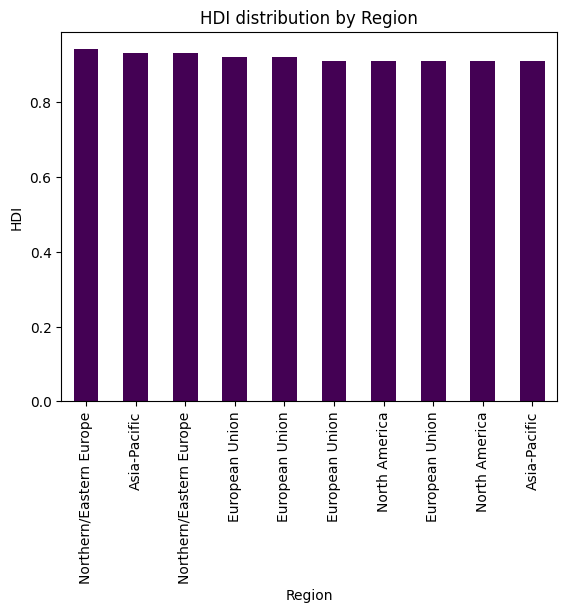

In [65]:
# HDI distribution by Region
df3=df.set_index('Region')
ax=df3['HDI'].sort_values(ascending=False).head(10).plot(kind='bar',colormap='viridis')
ax.set_xlabel('Region')
ax.set_ylabel('HDI')
ax.set_title('HDI distribution by Region')
plt.show()

In [157]:
df.columns

Index(['Country', 'Region', 'Population (millions)', 'HDI', 'GDP per Capita',
       'Cropland Footprint', 'Grazing Footprint', 'Forest Footprint',
       'Carbon Footprint', 'Fish Footprint', 'Total Ecological Footprint',
       'Cropland', 'Grazing Land', 'Forest Land', 'Fishing Water',
       'Urban Land', 'Total Biocapacity', 'Biocapacity Deficit or Reserve',
       'Earths Required', 'Countries Required'],
      dtype='object')

In [75]:
# Correlations between numerical data
df[['Population (millions)', 'HDI', 'GDP per Capita',
       'Cropland Footprint', 'Grazing Footprint', 'Forest Footprint',
       'Carbon Footprint', 'Fish Footprint', 'Total Ecological Footprint',
       'Cropland', 'Grazing Land', 'Forest Land', 'Fishing Water',
       'Urban Land', 'Total Biocapacity', 'Biocapacity Deficit or Reserve',
       'Earths Required', 'Countries Required']].corr(method='pearson')

,Population (millions),HDI,GDP per Capita,Cropland Footprint,Grazing Footprint,Forest Footprint,Carbon Footprint,Fish Footprint,Total Ecological Footprint,Cropland,Grazing Land,Forest Land,Fishing Water,Urban Land,Total Biocapacity,Biocapacity Deficit or Reserve,Earths Required,Countries Required
Population (millions),1.000000,0.056251,-0.035619,0.013378,-0.067449,-0.053483,-0.001042,-0.049387,-0.057722,0.029767,-0.058000,-0.040148,-0.062101,0.083943,-0.051211,-0.039241,-0.057650,-0.029374
HDI,0.056251,1.000000,0.501608,0.499472,0.114169,0.212873,0.460490,0.091054,0.367398,0.316144,0.077662,-0.086703,-0.082038,0.399859,-0.051246,-0.124876,0.367662,0.012085
GDP per Capita,-0.035619,0.501608,1.000000,0.393777,0.078629,0.218011,0.686838,0.093950,0.728793,0.233237,-0.006640,-0.044231,0.051156,0.358626,0.008578,-0.138276,0.728809,0.235494
Cropland Footprint,0.013378,0.499472,0.393777,1.000000,0.155887,0.499595,0.468664,0.160646,0.433450,0.769564,0.120232,-0.019225,0.111796,0.507649,0.025697,-0.061813,0.433380,-0.011385
Grazing Footprint,-0.067449,0.114169,0.078629,0.155887,1.000000,0.112035,0.172553,-0.008678,0.219096,0.144167,0.702034,0.030549,0.092996,0.148453,0.092818,0.048013,0.219072,-0.043829
Forest Footprint,-0.053483,0.212873,0.218011,0.499595,0.112035,1.000000,0.254019,0.021135,0.314228,0.451286,0.118268,0.155407,0.134980,0.506889,0.172219,0.107703,0.314499,0.052973
Carbon Footprint,-0.001042,0.460490,0.686838,0.468664,0.172553,0.254019,1.000000,0.202442,0.817477,0.168517,-0.007107,0.027101,0.135268,0.289800,0.034498,-0.130392,0.817554,0.265563
Fish Footprint,-0.049387,0.091054,0.093950,0.160646,-0.008678,0.021135,0.202442,1.000000,0.143047,-0.011682,-0.036834,0.026947,0.183697,0.034341,0.030277,0.001319,0.142828,0.045862
Total Ecological Footprint,-0.057722,0.367398,0.728793,0.433450,0.219096,0.314228,0.817477,0.143047,1.000000,0.241647,0.067196,0.014018,0.118596,0.263843,0.066580,-0.135312,0.999997,0.282719
Cropland,0.029767,0.316144,0.233237,0.769564,0.144167,0.451286,0.168517,-0.011682,0.241647,1.000000,0.317967,0.016492,0.112090,0.482150,0.100125,0.050714,0.241634,-0.140962


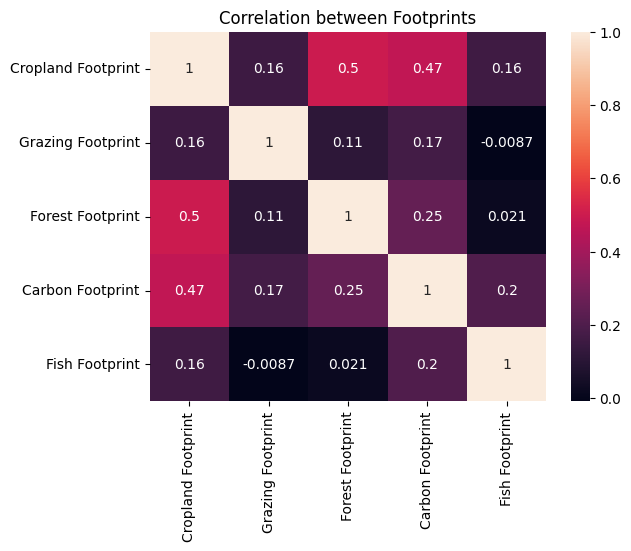

In [69]:
df_footprint_corr=df[['Cropland Footprint', 'Grazing Footprint', 'Forest Footprint',
       'Carbon Footprint', 'Fish Footprint']].corr()

sns.heatmap(df_footprint_corr,annot=True)
plt.title("Correlation between Footprints")
plt.show()

Text(0.5, 1.0, 'Correlation between Lands')

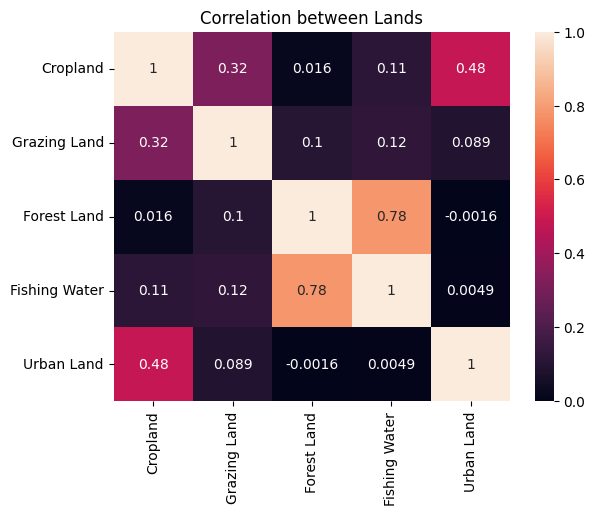

In [79]:
df_land_corr=df[['Cropland', 'Grazing Land', 'Forest Land', 'Fishing Water',
       'Urban Land']].corr()
sns.heatmap(df_land_corr,annot=True)
plt.title("Correlation between Lands")

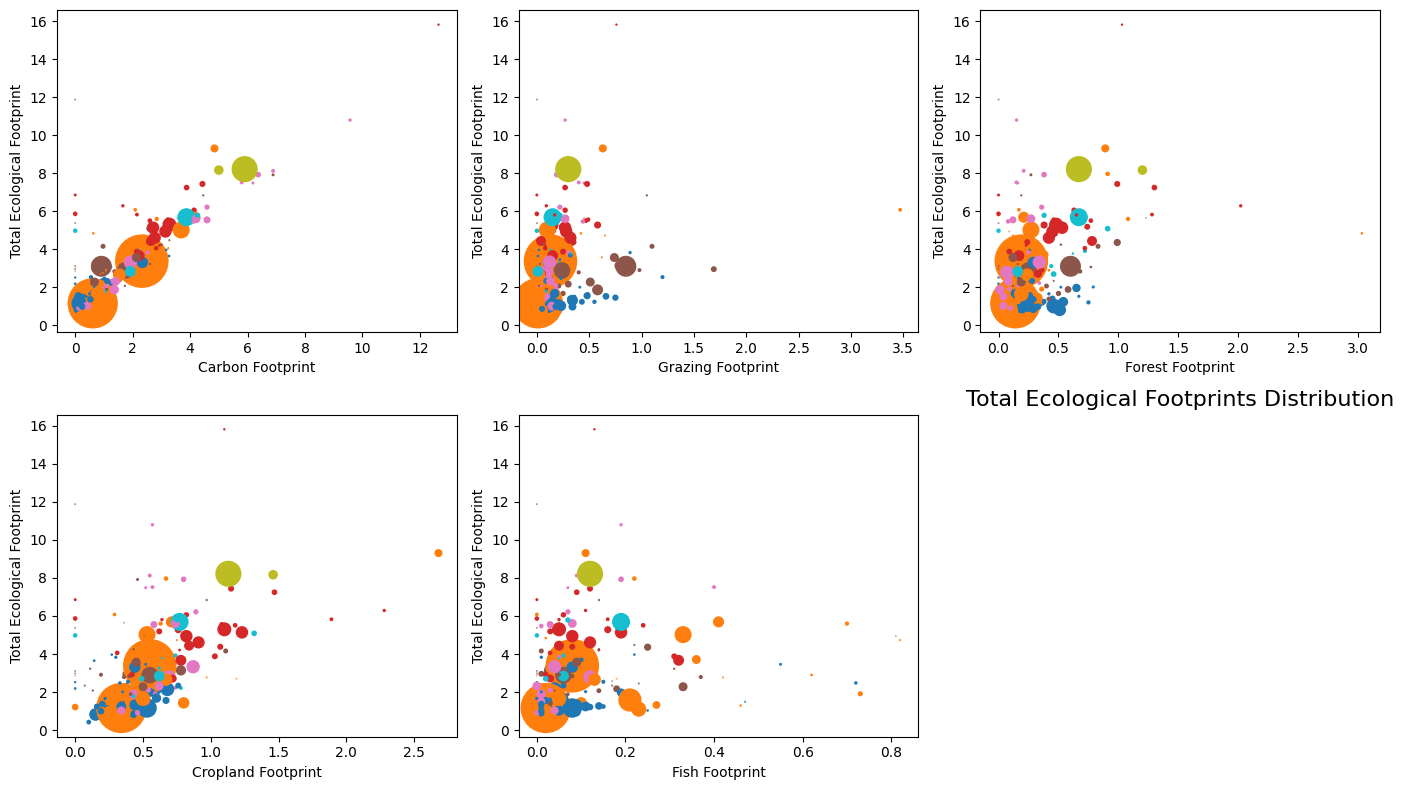

In [97]:
# Total Ecological Footprints distribution by each category using scatter plot
fig, axs = plt.subplots(2, 3, figsize=(14, 8))
cmap=plt.get_cmap('tab10')
axs[0,0].scatter(x=df['Carbon Footprint'], y=df['Total Ecological Footprint'],c=df['Region'].astype('category').cat.codes,cmap=cmap,s=df['Population (millions)'])
axs[0,0].set(xlabel='Carbon Footprint', ylabel='Total Ecological Footprint')
axs[0,1].scatter(x=df['Grazing Footprint'], y=df['Total Ecological Footprint'],c=df['Region'].astype('category').cat.codes,cmap=cmap,s=df['Population (millions)'])
axs[0,1].set(xlabel='Grazing Footprint', ylabel='Total Ecological Footprint')
axs[0,2].scatter(x=df['Forest Footprint'], y=df['Total Ecological Footprint'],c=df['Region'].astype('category').cat.codes,cmap=cmap,s=df['Population (millions)'])
axs[0,2].set(xlabel='Forest Footprint', ylabel='Total Ecological Footprint')
axs[1,0].scatter(x=df['Cropland Footprint'], y=df['Total Ecological Footprint'],c=df['Region'].astype('category').cat.codes,cmap=cmap,s=df['Population (millions)'])
axs[1,0].set(xlabel='Cropland Footprint', ylabel='Total Ecological Footprint')
axs[1,1].scatter(x=df['Fish Footprint'], y=df['Total Ecological Footprint'],c=df['Region'].astype('category').cat.codes,cmap=cmap,s=df['Population (millions)'])
axs[1,1].set(xlabel='Fish Footprint', ylabel='Total Ecological Footprint')
axs[1, 2].axis('off') 

plt.title("Total Ecological Footprints Distribution", fontsize=16)
plt.tight_layout()
plt.show()


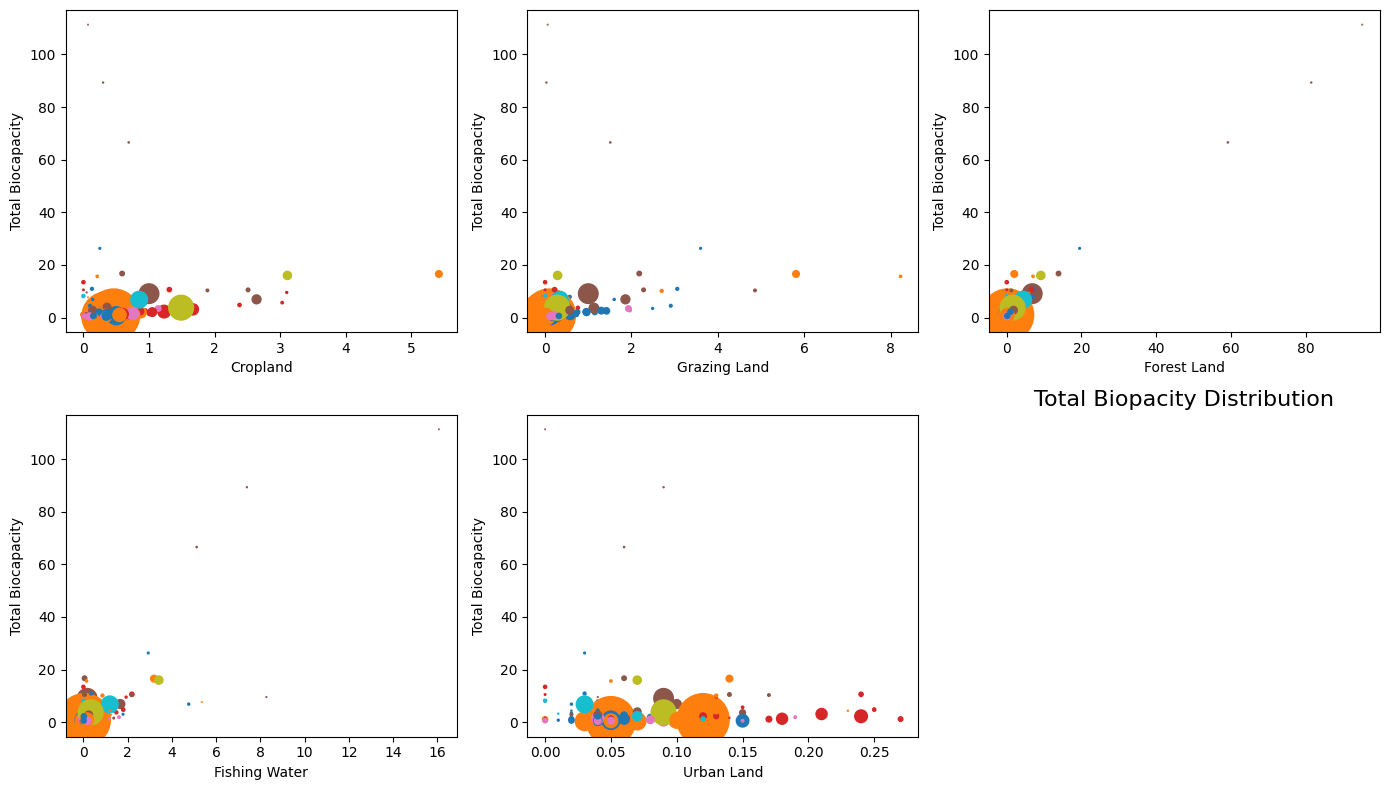

In [99]:
# Total Biopacity distribution by each category using scatter plot
fig, axs = plt.subplots(2, 3, figsize=(14, 8))
cmap=plt.get_cmap('tab10')
axs[0,0].scatter(x=df['Cropland'], y=df['Total Biocapacity'],c=df['Region'].astype('category').cat.codes,cmap=cmap,s=df['Population (millions)'])
axs[0,0].set(xlabel='Cropland', ylabel='Total Biocapacity')
axs[0,1].scatter(x=df['Grazing Land'], y=df['Total Biocapacity'],c=df['Region'].astype('category').cat.codes,cmap=cmap,s=df['Population (millions)'])
axs[0,1].set(xlabel='Grazing Land', ylabel='Total Biocapacity')
axs[0,2].scatter(x=df['Forest Land'], y=df['Total Biocapacity'],c=df['Region'].astype('category').cat.codes,cmap=cmap,s=df['Population (millions)'])
axs[0,2].set(xlabel='Forest Land', ylabel='Total Biocapacity')
axs[1,0].scatter(x=df['Fishing Water'], y=df['Total Biocapacity'],c=df['Region'].astype('category').cat.codes,cmap=cmap,s=df['Population (millions)'])
axs[1,0].set(xlabel='Fishing Water', ylabel='Total Biocapacity')
axs[1,1].scatter(x=df['Urban Land'], y=df['Total Biocapacity'],c=df['Region'].astype('category').cat.codes,cmap=cmap,s=df['Population (millions)'])
axs[1,1].set(xlabel='Urban Land', ylabel='Total Biocapacity')
axs[1, 2].axis('off') 

plt.title("Total Biopacity Distribution", fontsize=16)
plt.tight_layout()
plt.show()

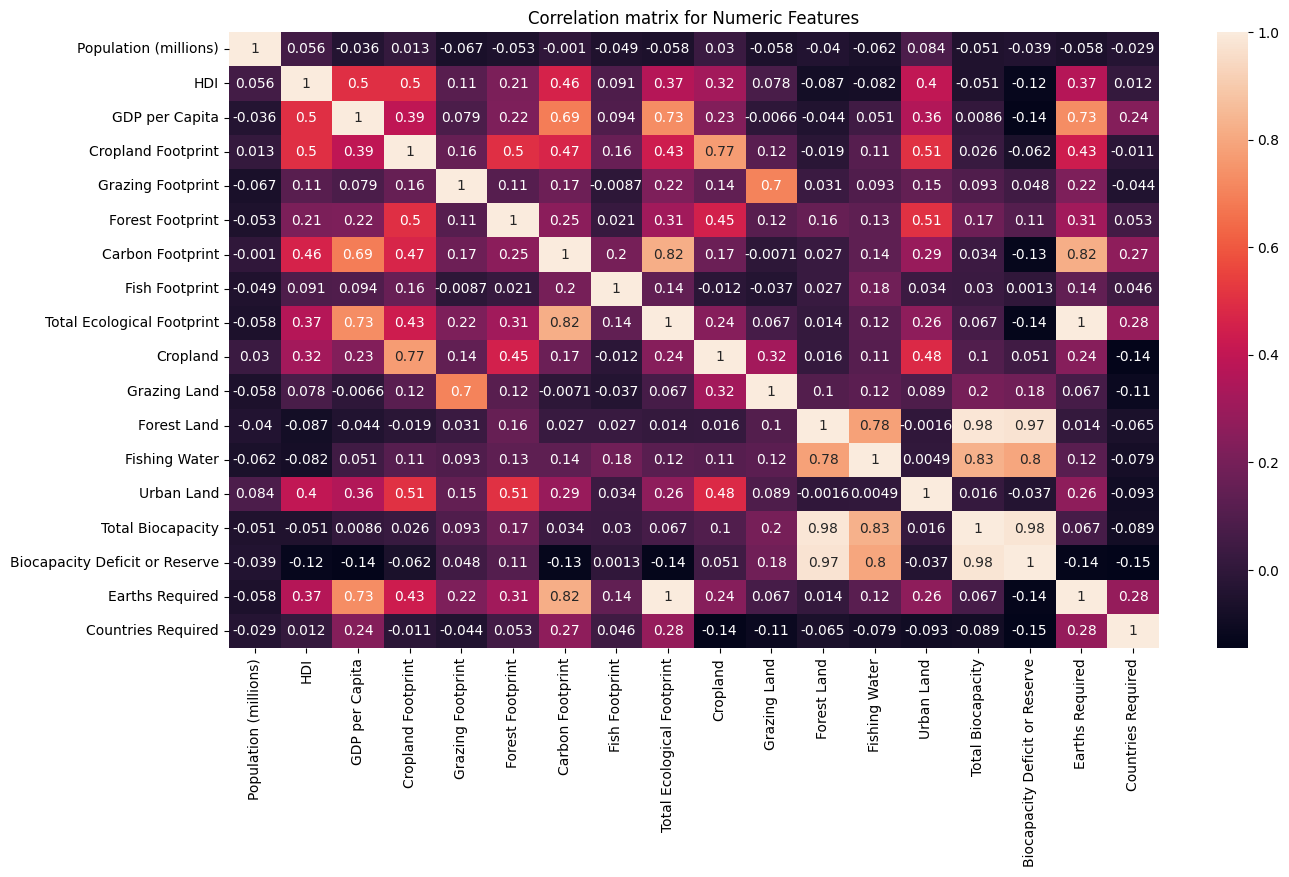

In [429]:
df_corr=df[['Population (millions)', 'HDI', 'GDP per Capita',
       'Cropland Footprint', 'Grazing Footprint', 'Forest Footprint',
       'Carbon Footprint', 'Fish Footprint', 'Total Ecological Footprint',
       'Cropland', 'Grazing Land', 'Forest Land', 'Fishing Water',
       'Urban Land', 'Total Biocapacity', 'Biocapacity Deficit or Reserve',
       'Earths Required', 'Countries Required']].corr()
plt.figure(figsize=(15, 8))
sns.heatmap(df_corr,annot=True)
plt.title("Correlation matrix for Numeric Features")
plt.show()